![](https://cdn.nba.net/nba-drupal-prod/2020-04/Video_T1_Hero_TopVideo.jpg)

# HERO OR ZERO

# K Nearest Neighbor Classifier Model¶

In [4]:
# Import the neccessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import preprocessing
print("All neccessary libraries imported")

All neccessary libraries imported


In [5]:
# Raw data from Resources directory (change the link as needed)
attribute_data = "Data/ML data.csv"

In [7]:
# Read the  data into a dataframe
df_attributes = pd.read_csv(attribute_data)
# Drop the columns with string values
df_attributes.drop(columns=['Player','Position','Team'],inplace=True)
# Let's see the shape and the first 5 rows of the dataframe
print('\033[1m'+"The shape of the {} dataframe is {}:" .format("attribute",df_attributes.shape)+'\033[0m')
df_attributes.head()

The shape of the attribute dataframe is (125, 10):


,Age,Game,FG%,3P%,2P%,Reb,Ast,Pts,Year,Contract Salary
0,20,78,0.473,0.296,0.531,6.5,1.6,9.2,2015,4171680.0
1,21,80,0.454,0.288,0.528,5.1,1.9,12.7,2016,4351320.0
2,22,58,0.434,0.336,0.497,7.9,2.3,17.6,2017,5504420.0
3,23,78,0.449,0.349,0.499,7.4,3.7,16.0,2018,21590909.0
4,24,62,0.470,0.369,0.457,7.7,3.7,14.4,2019,19863636.0


In [8]:
# Let's see the column names in the dataframe
print(df_attributes.columns.tolist())

['Age', 'Game ', 'FG%', '3P%', '2P%', 'Reb', 'Ast', 'Pts', 'Year ', 'Contract Salary']


In [9]:
# Basic information of the df_fire dataframe by the info() method
df_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              125 non-null    int64  
 1   Game             125 non-null    int64  
 2   FG%              125 non-null    float64
 3   3P%              125 non-null    float64
 4   2P%              125 non-null    float64
 5   Reb              125 non-null    float64
 6   Ast              125 non-null    float64
 7   Pts              125 non-null    float64
 8   Year             125 non-null    int64  
 9   Contract Salary  125 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 9.9 KB


## Create a new column for popularity rank¶

In [10]:
# Create a new column # Create a new column with Rank HIT or MISS
df_attributes["Rank"] = df_attributes["Contract Salary"].apply(lambda x: 'HIT' if x <=5000000 else 'MISS')
# Let's see the new column
df_attributes.head()

,Age,Game,FG%,3P%,2P%,Reb,Ast,Pts,Year,Contract Salary,Rank
0,20,78,0.473,0.296,0.531,6.5,1.6,9.2,2015,4171680.0,HIT
1,21,80,0.454,0.288,0.528,5.1,1.9,12.7,2016,4351320.0,HIT
2,22,58,0.434,0.336,0.497,7.9,2.3,17.6,2017,5504420.0,MISS
3,23,78,0.449,0.349,0.499,7.4,3.7,16.0,2018,21590909.0,MISS
4,24,62,0.470,0.369,0.457,7.7,3.7,14.4,2019,19863636.0,MISS


## Creating input and output datasets¶

In [12]:
import numpy as np
# Create a copy of df_attributes
df_copy = df_attributes.copy()
# Create X and Y numpy arrays
df_y = df_copy[['Rank']].to_numpy() # Keep only the rank column
df_copy.drop(columns=['Contract Salary','Rank'],inplace=True) # Keep only the attributes
X = df_copy.to_numpy() # Convert the dataframe to numpy array
print('\033[1m'+"Shape of the X dataset: {}".format(X.shape)+'\033[0m')
print('\033[1m'+"Shape of the y dataset: {}".format(df_y.shape)+'\033[0m')

Shape of the X dataset: (125, 9)
Shape of the y dataset: (125, 1)


In [13]:
# Creating a numpy one dimensional array for labels
y = df_y.ravel()
y[0:5]

array(['HIT', 'HIT', 'MISS', 'MISS', 'MISS'], dtype=object)

## Creating train and test splits¶

In [14]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Shape of the train & test set
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (100, 9) (100,)
Test set: (25, 9) (25,)


## Data Preprocessing¶

In [15]:

# Importing StandardScaler from sklearn library
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

In [16]:
# Scaling both test and train data for X dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Creating a K-Nearest-Neighbor(KNN) Classifier

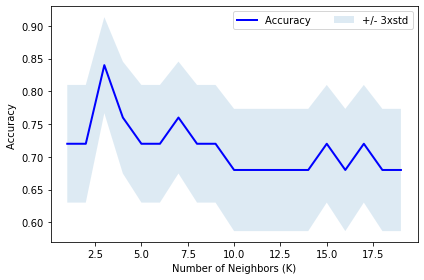

The best accuracy was with 0.84 with k= 3


In [22]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# We can calculate the accuracy of KNN for different Ks.
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
# Calculating accuracy for different Ks
for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_scaled,y_train)
    yhat=neigh.predict(X_test_scaled)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)    
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
# Plot model accuracy for Different number of Neighbors
plt.plot(range(1,Ks),mean_acc,'-b',linewidth=2)
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.15)
plt.legend(('Accuracy ', '+/- 3xstd'),fontsize='medium',ncol=2)
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
# Print the K value that gives best accuracy
print('\033[1m'+"The best accuracy was with", round(mean_acc.max(),4), "with k=", (mean_acc.argmax()+1))

In [19]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score 

# k value that gives best accuracy
k = 14
# Create the KNN classifier engine & make prediction
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
# Evaluating the KNN Classifier
print("\033[1m F1 Score: \033[0m \n",metrics.f1_score(y_test,yhat,average='weighted'))
print("\033[1m Classification Report: \033[0m \n",metrics.classification_report(y_test,yhat))

 F1 Score:  
 0.7961904761904762
 Classification Report:  
               precision    recall  f1-score   support

         HIT       0.71      0.62      0.67         8
        MISS       0.83      0.88      0.86        17

    accuracy                           0.80        25
   macro avg       0.77      0.75      0.76        25
weighted avg       0.80      0.80      0.80        25



 Confusion Matrix, without normalization 
[[ 5  3]
 [ 2 15]]


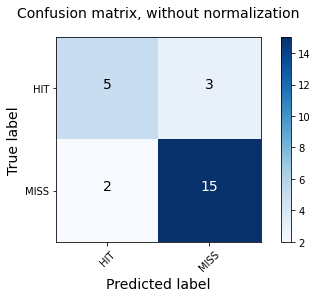

In [20]:
import itertools
from sklearn.metrics import confusion_matrix
# This function prints and plots the confusion matrix.
# Normalization can be applied by setting `normalize=True
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=14,pad=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("\033[1m Confusion Matrix, without normalization \033[0m")
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],fontsize=14,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label',fontsize=14)
    plt.xlabel('Predicted label',fontsize=14)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['HIT','MISS'],
                      title='Confusion matrix, without normalization')
plt.show()